In [1]:
import new_data_process
reload(new_data_process)
import research
reload(research)
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os

In [2]:
target = 'ru0'
train_start, train_end, test_start, test_end = '20180315', ' 20180319', '20180320', '20180320'
period = '1s'
resample = False
resample_period = '2s'

In [3]:
rese = research.Research(ticker1=target)
train = research.Train(target = target)

In [4]:
tickerlst = rese.get_symbols()

get most correlated symbols from mysql database according to appointed period and lag.

In [5]:
train_daylst = rese.generate_daylst(train_start, train_end)
test_daylst = rese.generate_daylst(test_start, test_end)

In [6]:
train_data = rese.load_data(tickerlst, daylst=train_daylst, period = period)
test_data = rese.load_data(tickerlst, daylst=test_daylst, period = period)

In [7]:
price_df = rese.load_price(train_daylst)

In [8]:
if resample:
    train_data = train.sample(resample_period=resample_period, df=train_data, keep_target_no_zero=False)
    test_data = train.sample(resample_period = resample_period, df=test_data, keep_target_no_zero=False)

In [9]:
from sklearn.linear_model import Ridge, RidgeCV
clf = RidgeCV(alphas=np.arange(0.05,1,0.05),normalize=True)
train_x, train_y= train.split_x_y(train_data)
clf.fit(train_x, train_y)
print 'train score is %f' %clf.score(train_x, train_y)
print 'alpha is %.4f' %clf.alpha_

train score is 0.053245
alpha is 0.0500


In [10]:
train_predict =clf.predict(train_x)
contrast = pd.DataFrame({'pred':train_predict, 'true':train_y})
contrast.corr()

,pred,true
pred,1.000000,0.230946
true,0.230946,1.000000


In [11]:
test_x, test_y = train.split_x_y(test_data)
test_pred = clf.predict(test_x)
test_contrast = pd.DataFrame({'pred':test_pred, 'true':test_y})
test_contrast.corr()

,pred,true
pred,1.000000,0.056211
true,0.056211,1.000000


In [42]:
# plt.plot(train_predict,label='predict valus')
# plt.plot(train_y, label='true values')
# plt.legend()
# plt.show()

Simulate Trade

In [12]:
trade = research.Trade(target)

In [13]:
model_name = 'ridge'
to_save_dir = '/media/charles/charles_13162398828/hdd/output/trade_asset/'+model_name+'/'
if not os.path.exists(to_save_dir):
    os.makedirs(to_save_dir)
record = {}
for buy_thres in np.arange(1,3,0.1):
    for sell_thres in np.arange(-1,-2,-0.1):
        pair = str(buy_thres)+'_'+str(sell_thres)
        asset = trade.simu_trade1(price_df, train_predict, buy_threshold=buy_thres,sell_threshold=sell_thres
                                  , hold_per_trade=5)
        record[pair] = (max(asset), min(asset))
#         plt.figure(figsize= (12,8))
#         plt.plot(asset)
#         plt.savefig(to_save_dir+pair+'.jpg')
#         plt.close()

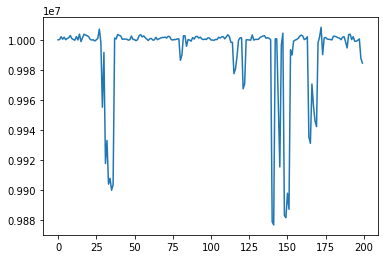

In [58]:
plt.plot(map(lambda X:X[0]+X[1], record.values()))
plt.show()

In [61]:
sum_array = map(lambda X:X[0]+X[1], record.values())
max_val = max(sum_array)
for i in range(len(sum_array)):
    if sum_array[i] == max_val:
        print i
        break

172


In [64]:
record.keys()[172]

'1.2_-1.2'

In [14]:
test_price_df = rese.load_price(test_daylst)
test_asset = trade.simu_trade1(test_price_df, test_pred, buy_threshold=1.2,sell_threshold=-1.2
                                  , hold_per_trade=5)

research.py:138: Warning: Table 'future_fee' already exists
  primary key(ticker, fee_type))""")


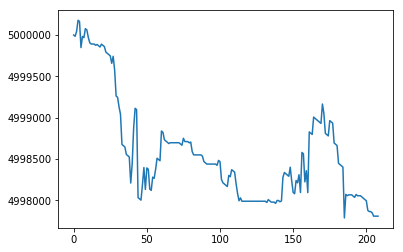

In [15]:
plt.plot(test_asset)
plt.show()

In [28]:
test

NameError: name 'double' is not defined